In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.applications import VGG16, ResNet50, InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score



In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Define dataset paths
train_data_dir = '/content/drive/MyDrive/dataset/training_data'
test_data_dir = '/content/drive/MyDrive/dataset/testing_data'


# Image dimensions and batch size
img_width, img_height = 224, 224
batch_size = 32

# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 384 images belonging to 4 classes.
Found 100 images belonging to 4 classes.


Epoch 1/10
12/12 [==============================] - 71s 6s/step - loss: 1.7239 - accuracy: 0.3984 - val_loss: 0.8125 - val_accuracy: 0.6771
Epoch 2/10
12/12 [==============================] - 71s 6s/step - loss: 0.9649 - accuracy: 0.5833 - val_loss: 0.8977 - val_accuracy: 0.6042
Epoch 3/10
12/12 [==============================] - 67s 6s/step - loss: 0.9111 - accuracy: 0.5990 - val_loss: 0.6574 - val_accuracy: 0.7604
Epoch 4/10
12/12 [==============================] - 70s 6s/step - loss: 0.7349 - accuracy: 0.6927 - val_loss: 0.5193 - val_accuracy: 0.7708
Epoch 5/10
12/12 [==============================] - 77s 6s/step - loss: 0.5916 - accuracy: 0.7474 - val_loss: 0.5492 - val_accuracy: 0.7604
Epoch 6/10
12/12 [==============================] - 88s 7s/step - loss: 0.4660 - accuracy: 0.8177 - val_loss: 0.3105 - val_accuracy: 0.9062
Epoch 7/10
12/12 [==============================] - 71s 6s/step - loss: 0.4128 - accuracy: 0.8333 - val_loss: 0.2254 - val_accuracy: 0.9167
Epoch 8/10
12/12 [==

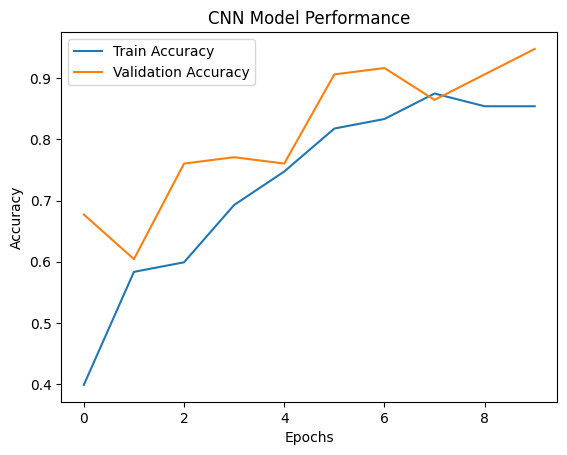

4/4 [==============================] - 6s 1s/step - loss: 0.1637 - accuracy: 0.9500
CNN Test Accuracy: 0.949999988079071


In [ ]:
import matplotlib.pyplot as plt
# Simple CNN model
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # Assuming 4 classes
])

# Compile the CNN model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the CNN model
history_cnn = cnn_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size
)

# Plot CNN model performance
plt.plot(history_cnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('CNN Model Performance')
plt.legend()
plt.show()

# Evaluate the CNN model
test_loss, test_acc = cnn_model.evaluate(test_generator)
print("CNN Test Accuracy:", test_acc)




